In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# Convert Datetime

In [3]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'],infer_datetime_format=True)
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'],infer_datetime_format=True)
print(train['pickup_datetime'].min())
print(train['pickup_datetime'].max())
print(train['dropoff_datetime'].min())
print(train['dropoff_datetime'].max())

2016-01-01 00:00:17
2016-06-30 23:59:39
2016-01-01 00:03:31
2016-07-01 23:02:03


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [5]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Remove out of bounds coordinates

In [6]:
#y = latitude
#x = longitude

#^
#|
#+-->

#latitude min nyc - max: 40.495397 - 40.916060
#longitude min nyc - max: -74.256217 - -73.699297
latitude_min = 40.495397
latitude_max = 40.916060
longitude_min = -74.256217
longitude_max = -73.699297
print(len(train[train['pickup_latitude'] < latitude_min]))
print(len(train[train['pickup_latitude'] > latitude_max]))
print(len(train[train['pickup_longitude'] < longitude_min]))
print(len(train[train['pickup_longitude'] > longitude_max]))

print(len(train[train['dropoff_latitude'] < latitude_min]))
print(len(train[train['dropoff_latitude'] > latitude_max]))
print(len(train[train['dropoff_longitude'] < longitude_min]))
print(len(train[train['dropoff_longitude'] > longitude_max]))

train.drop(train[train['pickup_latitude'] < latitude_min].index, inplace=True)
train.drop(train[train['pickup_latitude'] > latitude_max].index, inplace=True)
train.drop(train[train['pickup_longitude'] < longitude_min].index, inplace=True)
train.drop(train[train['pickup_longitude'] > longitude_max].index, inplace=True)

train.drop(train[train['dropoff_latitude'] < latitude_min].index, inplace=True)
train.drop(train[train['dropoff_latitude'] > latitude_max].index, inplace=True)
train.drop(train[train['dropoff_longitude'] < longitude_min].index, inplace=True)
train.drop(train[train['dropoff_longitude'] > longitude_max].index, inplace=True)

train.info()

39
132
63
144
56
608
152
672
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457301 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1457301 non-null object
vendor_id             1457301 non-null int64
pickup_datetime       1457301 non-null datetime64[ns]
dropoff_datetime      1457301 non-null datetime64[ns]
passenger_count       1457301 non-null int64
pickup_longitude      1457301 non-null float64
pickup_latitude       1457301 non-null float64
dropoff_longitude     1457301 non-null float64
dropoff_latitude      1457301 non-null float64
store_and_fwd_flag    1457301 non-null object
trip_duration         1457301 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 133.4+ MB


# Visualize coordinates

In [8]:
#y = latitude
#x = longitude
#1 = 158.266197
def get_pixels(source):
    range = train[source].max() - train[source].min()
    return (train[source] - train[source].min()) / range * 999.99999

#add_pixels('pickup_longitude', 'pickup_x')
train['pickup_x'] = get_pixels('pickup_longitude')
train['pickup_y'] = get_pixels('pickup_latitude')
train['dropoff_x'] = get_pixels('dropoff_longitude')
train['dropoff_y'] = get_pixels('dropoff_latitude')

In [9]:
print(train['pickup_longitude'].max() - train['pickup_longitude'].min())
print(train['pickup_longitude'][0] - train['pickup_longitude'].min())
print(train['pickup_x'].min(), '-', train['pickup_x'].max())
print(train['pickup_y'].min(), '-', train['pickup_y'].max())
print(train['dropoff_x'].min(), '-', train['dropoff_x'].max())
print(train['dropoff_y'].min(), '-', train['dropoff_y'].max())
train.head()

0.5515899658203125
0.2730102539062642
0.0 - 999.99999
0.0 - 999.99999
0.0 - 999.99999
0.0 - 999.99999


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_x,pickup_y,dropoff_x,dropoff_y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,494.951446,650.206281,522.796222,641.95398
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,498.105060,579.922591,460.084289,559.86219
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,500.622419,640.640397,449.554505,509.66721
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,444.396798,535.433928,437.075269,501.64074
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,511.452594,710.677637,507.873308,682.26813


In [12]:
imdata = np.zeros((1000,1000))
for row in train.itertuples():
    px, py, dx, dy = int(row[12]), int(row[13]), int(row[14]), int(row[15])
    imdata[px, py] = min(imdata[px, py] + 1, 50)
    imdata[dx, dy] = min(imdata[dx, dy] + 1, 50)

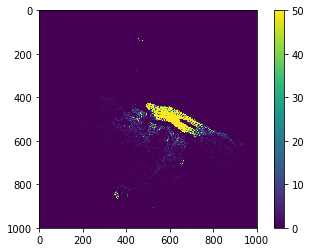

In [13]:
imdata.max()
plt.imshow(imdata)
plt.colorbar()